In [73]:
import pandas as pd

In [74]:
df = pd.read_csv ('estonia.csv')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  989 non-null    int64 
 1   Country      989 non-null    object
 2   Firstname    989 non-null    object
 3   Lastname     989 non-null    object
 4   Sex          989 non-null    object
 5   Age          989 non-null    int64 
 6   Category     989 non-null    object
 7   Survived     989 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 61.9+ KB


In [76]:
frequency_table = df.value_counts('Age')
print (frequency_table)

Age
21    27
45    27
67    25
30    25
50    24
      ..
12     1
9      1
6      1
4      1
87     1
Name: count, Length: 78, dtype: int64


In [77]:
frequency_table_percentages = df['Age'].value_counts(normalize=True) * 100
frequency_table_percentages

Age
21    2.730030
45    2.730030
30    2.527806
67    2.527806
50    2.426694
        ...   
9     0.101112
15    0.101112
0     0.101112
2     0.101112
87    0.101112
Name: proportion, Length: 78, dtype: float64

In [78]:
MinorSurvive = 0
AdultSurvive = 0
MinorDied = 0
AdultDied = 0
for idx in range(len(df)):
    if df.loc[idx]['Age'] < 18 and df.loc[idx]['Survived'] == 0:
        MinorDied += 1
    elif df.loc[idx]['Age'] < 18 and df.loc[idx]['Survived'] == 1:
        MinorSurvive += 1
    elif df.loc[idx]['Age'] >= 18 and df.loc[idx]['Survived'] == 0:
        AdultDied += 1
    elif df.loc[idx]['Age'] >= 18 and df.loc[idx]['Survived'] == 1:
        AdultSurvive += 1
conTable = pd.DataFrame ({
    'Minor': [MinorSurvive, MinorDied],
    'Adult': [AdultSurvive, AdultDied]
})
conTable.index = ['Survived', 'Died']
conTable.head()

,Minor,Adult
Survived,3,134
Died,21,831


In [79]:
maleSurvive = 0
femaleSurvive = 0
maleDied = 0
femaleDied = 0
for idx in range(len(df)):
    if df.loc[idx]['Sex'] == 'M' and df.loc[idx]['Survived'] == 0:
        maleDied += 1
    elif df.loc[idx]['Sex'] == 'M' and df.loc[idx]['Survived'] == 1:
        maleSurvive += 1
    elif df.loc[idx]['Sex'] == 'F' and df.loc[idx]['Survived'] == 0:
        femaleDied += 1
    elif df.loc[idx]['Sex'] == 'F' and df.loc[idx]['Survived'] == 1:
        femaleSurvive += 1
conTable2 = pd.DataFrame ({
    'Male': [maleSurvive, maleDied],
    'Female': [femaleSurvive, femaleDied]
})
conTable2.index = ['Survived', 'Died']
conTable2.head()

,Male,Female
Survived,110,27
Died,393,459


In [80]:
df.head()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0


In [84]:
frequency_table = df.value_counts('Category')
freak = pd.DataFrame(frequency_table)
freak

,count
Category,
P,796
C,193


In [82]:
import seaborn as sns

<Axes: xlabel='Category', ylabel='count'>

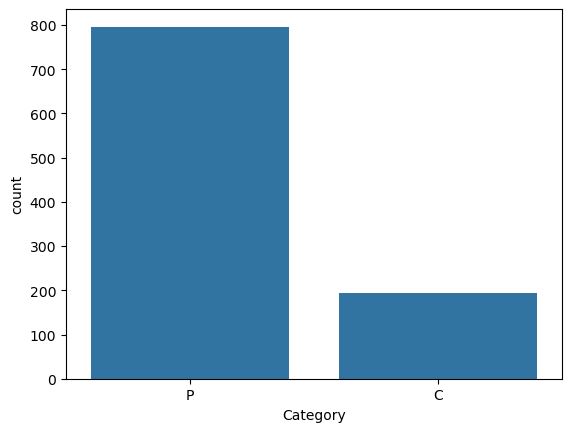

In [88]:
sns.barplot(data=freak, x="Category", y="count")